In [17]:
import pandas as pd
import numpy as np
from scipy.stats import norm
from scipy.stats import norm


df = pd.read_csv("kibergrad.csv")   # adjust path if needed


N = len(df)      
n = 400        
print("N: ", N)
print("n: ", n)

sample = df.sample(n=n, random_state=42)

children_col = "'OTROK'"

mean_children = sample[children_col].mean()


#STANDARDNA NAPAKA SE^2
sample_var = sample[children_col].var(ddof=1)

s2 = ((N -1)/N) * sample[children_col].var(ddof=1)
#to je s^2
SE2 = ((N - n) / N) * sample_var / n
SE = np.sqrt(SE2)

print("Povprečje: ", mean_children)
print(f"{mean_children:.7f}")
print("Standardna napaka: ", np.sqrt(SE2))

#Interval zaupanja
c = norm.ppf(0.975)
D = c * SE
c1 = mean_children - D
c2 = mean_children + D
print( c1, c2)

N:  43886
n:  400
Povprečje:  0.935
0.9350000
Standardna napaka:  0.05415129640260438
0.8288654093347421 1.041134590665258


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

df = pd.read_csv("kibergrad.csv")          # adjust path if necessary
children_col = "'OTROK'"
stratum_col  = "'CETRT'"

N = len(df)
n = 400


Nh = df[stratum_col].value_counts().sort_index()
Wh = Nh / N
nh = (Wh * n).round().astype(int)
nh[nh.idxmax()] += n - nh.sum()            # make sure total sample size is 400


strat_sample = df.groupby(stratum_col, group_keys=False).apply(
    lambda g: g.sample(n=nh.loc[g.name], random_state=42)
)


stats = strat_sample.groupby(stratum_col)[children_col].agg(
    mean_h="mean",
    var_h="var",
    n_h="count"
)
stats["N_h"] = Nh
stats["W_h"] = stats["N_h"] / N


strat_mean = (stats["W_h"] * stats["mean_h"]).sum()


stats["SE2_comp"] = (stats["W_h"] ** 2) * (1 - stats["n_h"] / stats["N_h"]) * stats["var_h"] / stats["n_h"]
SE = np.sqrt(stats["SE2_comp"].sum())


z = norm.ppf(0.975)
ci_lower, ci_upper = strat_mean - z * SE, strat_mean + z * SE

print(f"{strat_mean:.5f}")
print(f"Standard error: {SE:.8f}")
print(f"({ci_lower:.5f}, {ci_upper:.5f})")


0.99753
Standard error: 0.06009478
(0.87974, 1.11531)


/var/folders/k9/ftg3b6kn0nb8m_84gwwh031r0000gn/T/ipykernel_1094/3019682906.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  strat_sample = df.groupby(stratum_col, group_keys=False).apply(


**2. naloga**

/var/folders/k9/ftg3b6kn0nb8m_84gwwh031r0000gn/T/ipykernel_1094/1642563637.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  kevlar = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True)


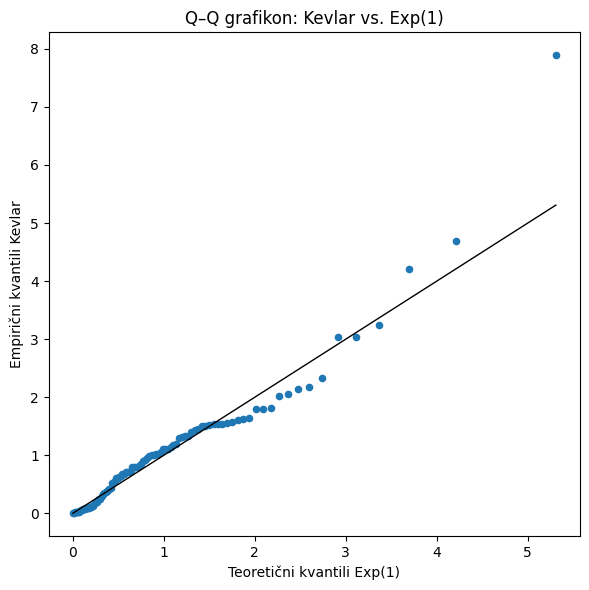

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

kevlar = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True)
x = np.sort(kevlar["t"].values)
n = len(x)

p = (np.arange(1, n + 1) - 0.5) / n
q = expon.ppf(p)

plt.figure(figsize=(6, 6))
plt.scatter(q, x, s=20)
plt.plot([0, q.max()], [0, q.max()], color="k", lw=1)
plt.xlabel("Teoretični kvantili Exp(1)")
plt.ylabel("Empirični kvantili Kevlar")
plt.title("Q–Q grafikon: Kevlar vs. Exp(1)")
plt.tight_layout()
#plt.savefig("qq_exp_standard.png", dpi=300)
plt.show()


In [28]:
lambda_hat = 1 / np.mean(x)
print(lambda_hat)

0.9766947103761725


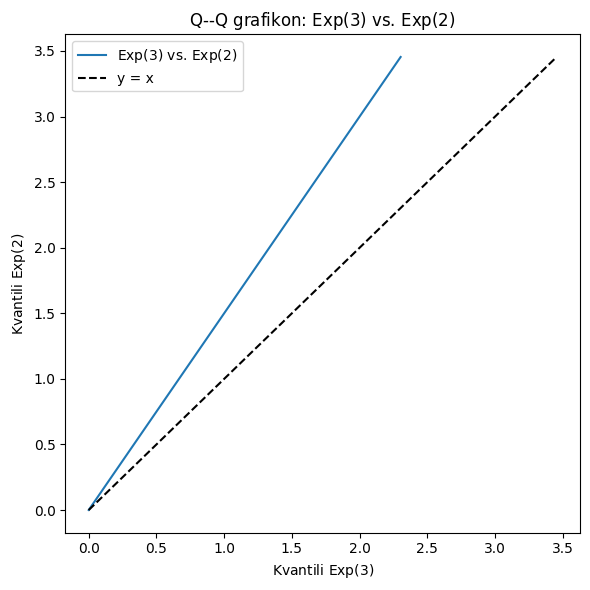

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alpha = np.linspace(0.001, 0.999, 500)
lambda_ = 3
mu = 2

x = -np.log(1 - alpha) / lambda_
y = -np.log(1 - alpha) / mu

plt.figure(figsize=(6, 6))
plt.plot(x, y, label="$\mathrm{Exp}(3)$ vs. $\mathrm{Exp}(2)$")
plt.plot([0, max(x.max(), y.max())], [0, max(x.max(), y.max())], 'k--', label="y = x")
plt.xlabel("Kvantili $\mathrm{Exp}(3)$")
plt.ylabel("Kvantili $\mathrm{Exp}(2)$")
plt.title("Q--Q grafikon: $\mathrm{Exp}(3)$ vs. $\mathrm{Exp}(2)$")
plt.legend()
plt.tight_layout()
#plt.savefig("qq_exp3_vs_exp2.png", dpi=300)
plt.show()

/var/folders/k9/ftg3b6kn0nb8m_84gwwh031r0000gn/T/ipykernel_2213/3428919137.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  kevlar = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True)


Lambda hat: 0.97669


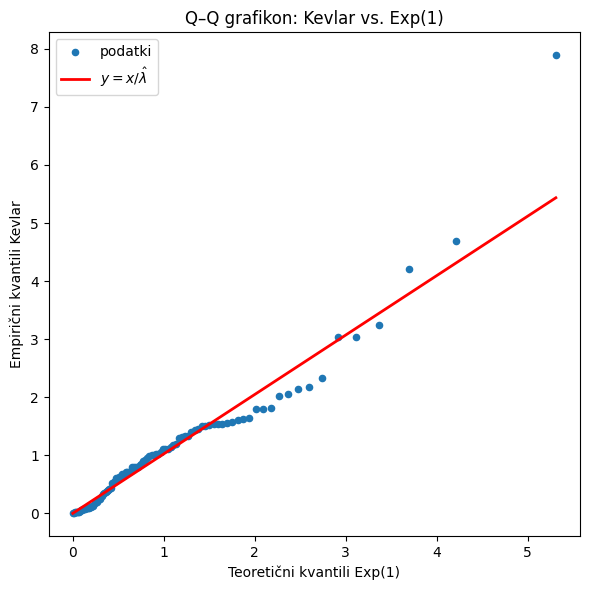

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

kevlar = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True)
x = np.sort(kevlar["t"].values)
n = len(x)

lambda_hat = 1 / np.mean(x)
print(f"Lambda hat: {lambda_hat:.5f}")

p = (np.arange(1, n + 1) - 0.5) / n
q = expon.ppf(p)

plt.figure(figsize=(6, 6))
plt.scatter(q, x, s=20, label="podatki")

plt.plot([0, q.max()], [0, q.max() / lambda_hat], color="red", lw=2, label=fr"$y = x / \hat{{\lambda}}$")

plt.xlabel("Teoretični kvantili Exp(1)")
plt.ylabel("Empirični kvantili Kevlar")
plt.title("Q–Q grafikon: Kevlar vs. Exp(1)")
plt.legend()
plt.tight_layout()
#plt.savefig("qq_exp_standard_with_fit_d.png", dpi=300)
plt.show()


/var/folders/k9/ftg3b6kn0nb8m_84gwwh031r0000gn/T/ipykernel_2213/2077882565.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True).t.values


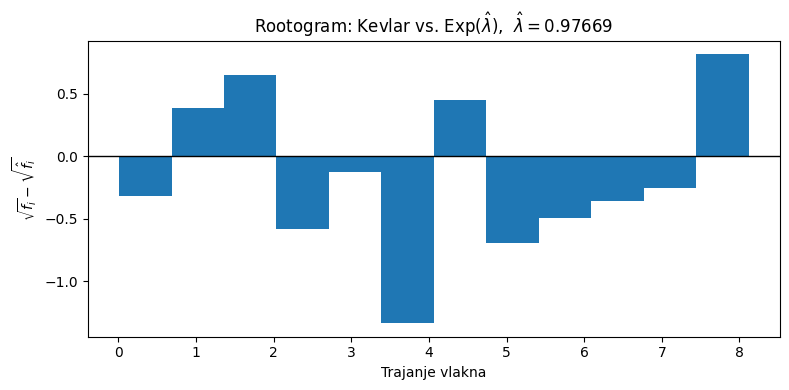

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon


data = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True).t.values
n = len(data)

lambda_hat = 1 / data.mean()


iqr = np.subtract(*np.percentile(data, [75, 25]))
h = 2.6 * iqr / (n ** (1 / 3)) #Modificiran Friedman-Diaconis
bins = np.arange(data.min(), data.max() + h, h)

O, edges = np.histogram(data, bins=bins)
a, b = edges[:-1], edges[1:]
centers = (a + b) / 2
widths = b - a

F = lambda x: 1 - np.exp(-lambda_hat * x) #porazdelitvena funckija za Exp(lambda_hat)
E = n * (F(b) - F(a)) #p_i


d = np.sqrt(O) - np.sqrt(E)


plt.figure(figsize=(8, 4))
for c, w, di in zip(centers, widths, d):
    plt.bar(c, di, width=w, color="C0", align="center")

plt.axhline(0, color="k", linewidth=1)
plt.xlabel("Trajanje vlakna")
plt.ylabel(r"$\sqrt{f_i}-\sqrt{\hat{f_i}}$")
plt.title(r"Rootogram: Kevlar vs. $\mathrm{Exp}(\hat{\lambda})$,  $\hat{\lambda}=%.5f$" % lambda_hat)
plt.tight_layout()
#plt.savefig("rootogram_e.png", dpi=300)
plt.show()


In [11]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.stats import expon

x = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True)["t"].values
x.sort()
n = len(x)
lam_hat = 1 / x.mean()

p = (np.arange(1, n + 1) - .5) / n
q_std = expon.ppf(p)                # Exp(1) quantiles
x_log, q_log = np.log10(x), np.log10(q_std)


plt.figure(figsize=(6,6))
plt.scatter(q_log, x_log, s=20)
plt.plot([q_log.min(), q_log.max()], [q_log.min(), q_log.max()], 'k-')
plt.xlabel(r'$\log_{10}$ kvantili Exp(1)')
plt.ylabel(r'$\log_{10}$ empirični kvantili')
plt.title('Q–Q (log–log)')
plt.tight_layout(); plt.savefig('f_a_qq_exp1_log.png', dpi=300); plt.close()


lam1, lam2 = 3, 2
q1 = -np.log(1-p)/lam1
q2 = -np.log(1-p)/lam2
plt.figure(figsize=(6,6))
plt.scatter(np.log10(q1), np.log10(q2), s=20)
mx = max(np.log10(q1).max(), np.log10(q2).max())
plt.plot([0, mx], [0, mx], 'k-')
plt.xlabel(r'$\log_{10}$ kvantili Exp(3)')
plt.ylabel(r'$\log_{10}$ kvantili Exp(2)')
plt.title('Q–Q Exp(3) vs Exp(2) (log–log)')
plt.tight_layout(); plt.savefig('f_b_qq_3_2_log.png', dpi=300); plt.close()


plt.figure(figsize=(6,6))
plt.scatter(q_log, x_log, s=20)

plt.plot(q_log, np.log10(q_std/lam_hat), 'r-', lw=2)
plt.xlabel(r'$\log_{10}$ kvantili Exp(1)')
plt.ylabel(r'$\log_{10}$ empirični kvantili')
plt.title(r'Q–Q + $y=x/\hat\lambda$ (log–log)')
plt.tight_layout(); plt.savefig('f_d_qq_fit_log.png', dpi=300); plt.close()


x_log = np.log10(x)
iqr = np.subtract(*np.percentile(x_log, [75,25]))
h = 2.6*iqr / n**(1/3)
edges_log = np.arange(x_log.min(), x_log.max()+h, h)
edges = 10**edges_log
O, _ = np.histogram(x, bins=edges)
F = lambda z: 1 - np.exp(-lam_hat*z)
E = n*(F(edges[1:]) - F(edges[:-1]))
d = np.sqrt(O) - np.sqrt(E)
cent = (edges[:-1]+edges[1:])/2

plt.figure(figsize=(8,4))
plt.bar(cent, d, width=np.diff(edges), align='center')
plt.axhline(0, color='k')
plt.xscale('log')
plt.xlabel('Trajanje (log-l)')
plt.ylabel(r'$\sqrt{f_i}-\sqrt{\hat{f_i}}$')
plt.title('Rootogram (log x-os)')
plt.tight_layout(); plt.savefig('f_e_rootogram_log.png', dpi=300); plt.close()


/var/folders/k9/ftg3b6kn0nb8m_84gwwh031r0000gn/T/ipykernel_2213/1998135570.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  x = pd.read_csv("Kevlar.csv", header=None, names=["t"], delim_whitespace=True)["t"].values


**3. naloga**

In [21]:
import pandas as pd, numpy as np
from scipy.stats import t

data = pd.read_csv("Temp_LJ.csv")

Y = data["TEMPERATURA"].values
L = data["LETO"].values
M = data["MESEC"].values
n = len(Y)

X = np.column_stack((np.ones(n), L, M))
k = X.shape[1]

XtX_inv = np.linalg.inv(X.T @ X)
beta_hat = XtX_inv @ (X.T @ Y)

b0, b1, b2 = beta_hat
print(b0, b1, b2)

resid = Y - X @ beta_hat
sigma2_hat = resid @ resid / (n - k)
print("k :", k)

se_b1 = np.sqrt(sigma2_hat * XtX_inv[1, 1])
t_stat = b1 / se_b1
p_val = 2 * (1 - t.cdf(abs(t_stat), df=n - k))

print(se_b1, t_stat, p_val)


-104.32911599239821 0.05644605116754071 0.3967948717948657
k : 3
0.045317861758922856 1.2455585717573439 0.21374335560905133


In [ ]:
d = pd.read_csv("Temp_LJ.csv")
Y = d["TEMPERATURA"].values
L = d["LETO"].values
M = d["MESEC"].values
S = np.sin(2 * np.pi * M / 12)
C = np.cos(2 * np.pi * M / 12)

X = np.column_stack((np.ones(len(Y)), L, S, C))
XtX_inv = np.linalg.inv(X.T @ X)
b = XtX_inv @ (X.T @ Y)

r = Y - X @ b
s2 = (r @ r) / (len(Y) - X.shape[1])

se_b1 = np.sqrt(s2 * XtX_inv[1, 1])
t_stat = b[1] / se_b1
p_val = 2 * (1 - t.cdf(abs(t_stat), df=len(Y) - X.shape[1]))

print(b)        
print(se_b1)     
print(t_stat, p_val)


[-1.01749949e+02  5.64460512e-02 -5.15601850e+00 -9.00811988e+00]
0.010495363546647585
5.378189227721169 1.3655231634324139e-07


In [23]:

d = pd.read_csv("Temp_LJ.csv")
Y = d["TEMPERATURA"].values
L = d["LETO"].values
M = d["MESEC"].values
S = np.sin(2*np.pi*M/12)
C = np.cos(2*np.pi*M/12)

X = np.column_stack((np.ones(len(Y)), L, S, C))
XtX_inv = np.linalg.inv(X.T @ X)
b = XtX_inv @ (X.T @ Y)
resid = Y - X @ b
s2 = (resid @ resid)/(len(Y)-4)
df = len(Y)-4
t_crit = t.ppf(0.975, df)

x_jan = np.array([1, 2044, np.sin(2*np.pi*1/12), np.cos(2*np.pi*1/12)])
pred_jan = x_jan @ b
se_pred_jan = np.sqrt(s2*(1 + x_jan @ XtX_inv @ x_jan))
ci_jan = pred_jan - t_crit*se_pred_jan, pred_jan + t_crit*se_pred_jan

months = np.arange(1, 13)
S44 = np.sin(2*np.pi*months/12)
C44 = np.cos(2*np.pi*months/12)
X44 = np.column_stack((np.ones(12), np.full(12, 2044), S44, C44))
pred_all = X44 @ b
mean_2044 = pred_all.mean()

x_bar = X44.mean(axis=0)
se_pred_mean = np.sqrt(s2*(1/12 + x_bar @ XtX_inv @ x_bar))
ci_mean = mean_2044 - t_crit*se_pred_mean, mean_2044 + t_crit*se_pred_mean

print("January 2044 prediction:", pred_jan, "95% PI:", ci_jan)
print("Annual mean 2044 prediction:", mean_2044, "95% PI:", ci_mean)


January 2044 prediction: 3.246509355553542 95% PI: (-0.23529093325735673, 6.72830964436444)
Annual mean 2044 prediction: 13.625779260878291 95% PI: (12.39032189359104, 14.861236628165543)
